In [1]:
import read_data.read_data as rd
from clean_and_update.drop_data import drop_data
from clean_and_update.impute_data import impute_data
from clean_and_update.update_data import update
from analyze.predict_price import predict, calc_change
from analyze.bed_bath import bed_bath_chart


# get data
df = rd.get_listing_data()



In [2]:
# clean and update data
drop_data(df)
impute_data(df)
df = update(df)

df.head

<bound method NDFrame.head of       float_extra_people  float_cleaning_fee  float_security_deposit  \
1                    0.0                10.0                    95.0   
2                   20.0                 0.0                     0.0   
4                    0.0                15.0                     0.0   
5                    0.0                30.0                     0.0   
6                   25.0                 0.0                     0.0   
...                  ...                 ...                     ...   
3573                30.0                25.0                     0.0   
3574                35.0                 0.0                   950.0   
3575                24.0                 0.0                    95.0   
3580                24.0                 0.0                    95.0   
3583                30.0                 0.0                   100.0   

      float_price  float_host_acceptance_rate  float_host_response_rate  \
1            65.0             

In [3]:
# train, analyze, display data
corr_price = df.corr()['float_price'].sort_values()
# show correlation of features to price
print(corr_price)

room_type_Private room       -0.564112
float_host_acceptance_rate   -0.180782
reviews_per_month            -0.177829
zipcode_02125                -0.138722
number_of_reviews            -0.131644
                                ...   
float_cleaning_fee            0.453444
beds                          0.529719
bedrooms                      0.571340
accommodates                  0.601533
float_price                   1.000000
Name: float_price, Length: 84, dtype: float64


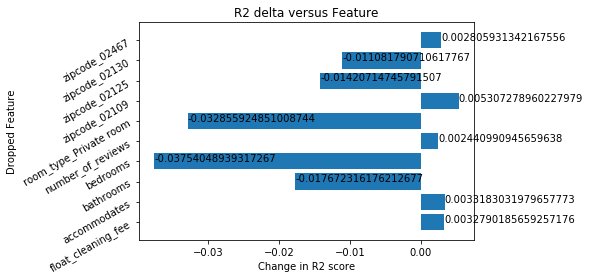

R2 score: 0.7047753011465256


In [4]:
# train and predict price of a place
score = predict(df)
calc_change(df, score)

print("R2 score: " + str(score))

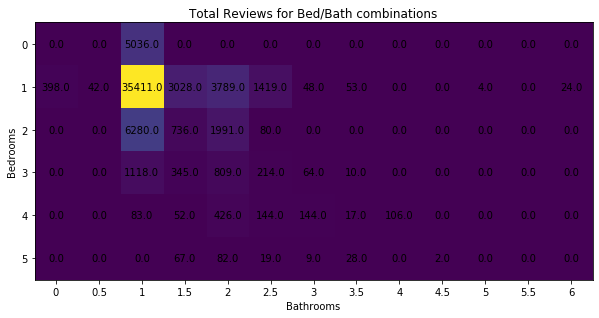

In [5]:
# analyze number of beds, bathrooms, and total reviews
new_df = bed_bath_chart(df)